<a href="https://colab.research.google.com/github/Janies-Garcia-Velasco/simulacion-n-2/blob/main/aceptacion_y_rechazo_cos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import random as rnd
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad


In [29]:

# Número de muestras a generar
n = 100000

# Constante c se elige tal que c >= max(f(x)) sobre el intervalo [0, 1]
c = 135 / 64

# Función f(x) de la cual queremos generar muestras
def f(x):
    return np.cos((np.pi*x)/2)

# Lista para almacenar las muestras aceptadas
lx = []


In [30]:
# Muestreo por aceptación-rechazo
i = 0
while i < n:
    y = rnd.uniform(0, 1)  # Generar un candidato de la distribución uniforme [0, 1]
    u = rnd.uniform(0, 1)  # Generar un número aleatorio uniforme para la condición de aceptación
    if u <= f(y) / c:  # Condición de aceptación
        lx.append(y)
        i += 1  # Incrementar solo si la muestra es aceptada

In [31]:
#varianza y media
media=np.mean(lx)
print("la media de la muestra es: ", media)

varianza=np.var(lx)
print("la varianza de la muestra: ", varianza)

la media de la muestra es:  0.36233804837102884
la varianza de la muestra:  0.05697803666859081


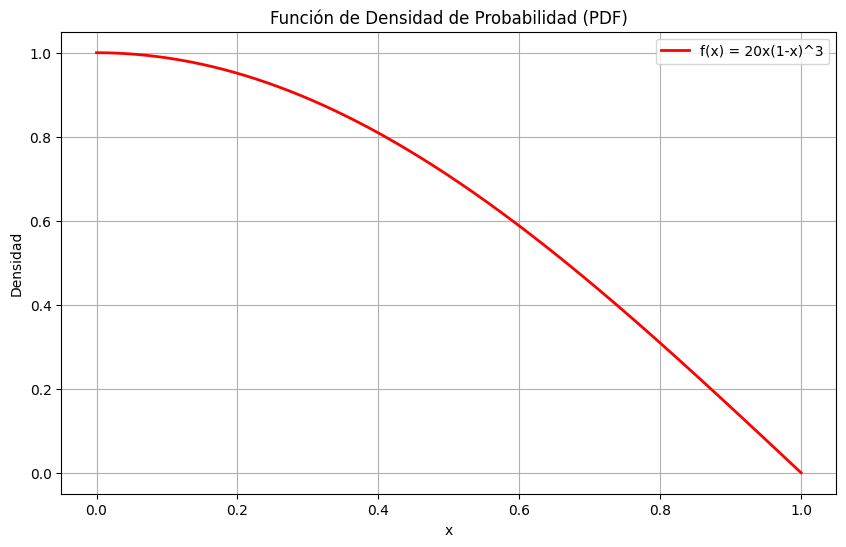

In [32]:
# Graficar la función de densidad de probabilidad (PDF)
x = np.linspace(0, 1, 1000)
y_pdf = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_pdf, 'r-', lw=2, label='f(x) = 20x(1-x)^3')
plt.title('Función de Densidad de Probabilidad (PDF)')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

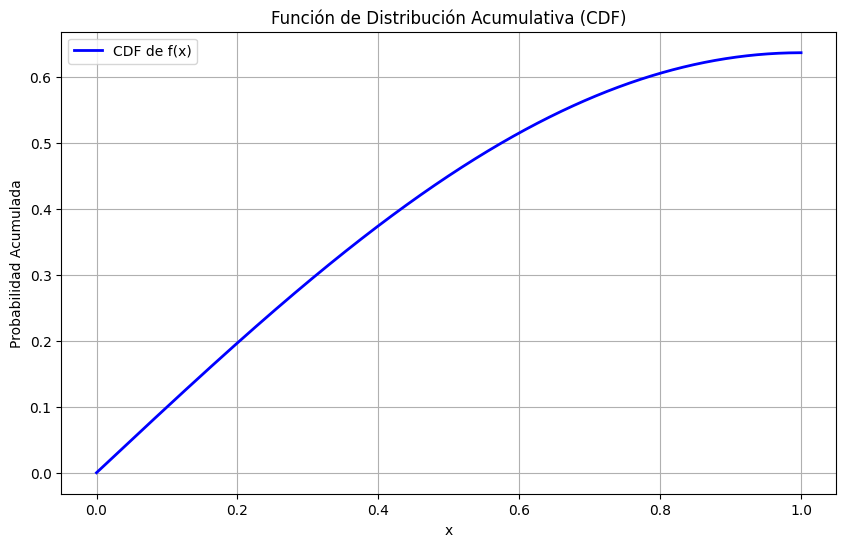

In [33]:
# Graficar la función de distribución acumulativa (CDF)
def F(x):
    return quad(f, 0, x)[0]

y_cdf = np.array([F(xi) for xi in x])

plt.figure(figsize=(10, 6))
plt.plot(x, y_cdf, 'b-', lw=2, label='CDF de f(x)')
plt.title('Función de Distribución Acumulativa (CDF)')
plt.xlabel('x')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.grid(True)
plt.show()

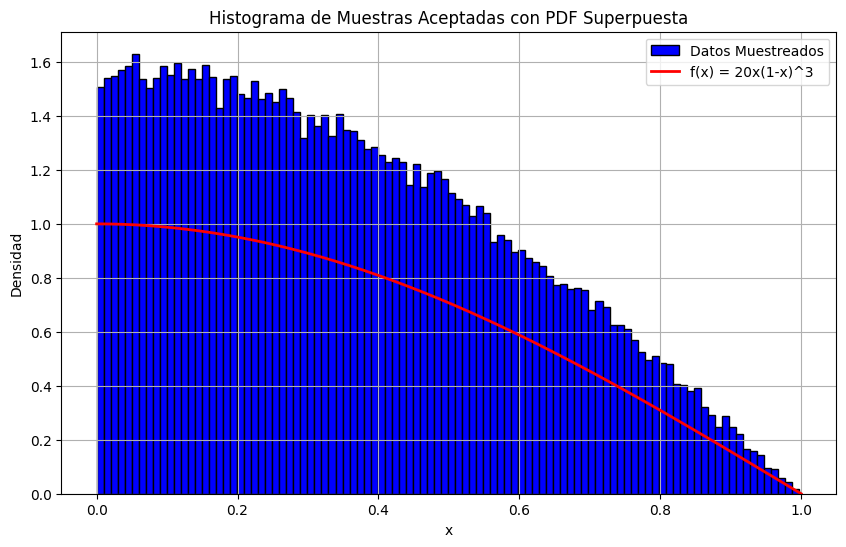

In [34]:

# Graficar el histograma de las muestras aceptadas
plt.figure(figsize=(10, 6))
plt.hist(lx, bins=100, density=True, color='blue', edgecolor='black', label='Datos Muestreados')
plt.plot(x, y_pdf, 'r-', lw=2, label='f(x) = 20x(1-x)^3')
plt.title('Histograma de Muestras Aceptadas con PDF Superpuesta')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()
